In [411]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import re

import torch

In [403]:
def load_events(events_file="../data/wlnu.dat", n_events=100_000):
    
    # construct regular expression
    
    vecs_reg_exp = ""
    for l in ("W", "L", "NU"):
        vecs_reg_exp += fr"{l:<4}(.+) (.+) (.+) (.+)\n" 
        
    reg_exp = r"EVENT .+\nGEN \n"
    reg_exp += vecs_reg_exp
    reg_exp += r"RECO\n"
    reg_exp += r"MET (.+) (.+)\n"
    reg_exp += vecs_reg_exp
    
    # load file
    
    text = ""
    with open("../data/wlnu.dat") as f:
        text = f.read()
        
    # create dataframes
    
    vec_names = []
    for l in ("W", "L", "Nu"):
        vec_names += [f"{l}_{c}" for c in ("px", "py", "pz", "E")]

    gen_df = pd.DataFrame(columns=vec_names) 
    reco_df = pd.DataFrame(columns=["MET_x", "MET_y"] + vec_names)
    
    # fill dataframes
    
    start = 0
    
    for event in tqdm(range(n_events)):
        
        # Data format:
        # lines[i] = EVENT N
        # lines[i+1] = GEN
        # lines[i+2] = W %f %f %f %f
        # lines[i+3] = L %f %f %f %f
        # lines[i+4] = NU %f %f %f %f
        # lines[i+5] = RECO
        # lines[i+6] = MET %f %f
        # lines[i+7] = W %f %f %f %f
        # lines[i+8] = L %f %f %f %f
        # lines[i+9] = NU %f %f %f %f
        # lines[i+10] = EVENT N+1
        
        # find start and end of event text
        
        end = start
        # find 10th next newline
        for _ in range(10):
            end += 1
            while text[end] != "\n":
                end += 1
        end += 1
        
        # extract values from text
        
        event_text = text[start:end]
        values = re.findall(reg_exp, event_text)[0]
            
        
        # fill gen_df
        
        gen_df.loc[len(gen_df)] = 0
        gen_row = gen_df.loc[len(gen_df) - 1]
        
        for i in range(len(gen_row)):
            gen_row[i] = float(values[i])
            
        used = len(gen_row)
            
        # fill reco_df
        reco_df.loc[len(reco_df)] = 0
        reco_row = reco_df.loc[len(reco_df) - 1]
        
        for i in range(len(reco_row)):
            reco_row[i] = float(values[used + i])
    
        # update start
    
        start = end
        
    return gen_df, reco_df

In [ ]:
gen_df, reco_df = load_events(n_events=100_000)
display(gen_df)
display(reco_df)

  0%|          | 0/100000 [00:00<?, ?it/s]

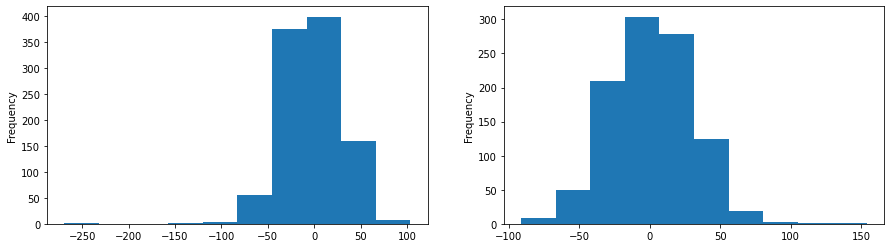

In [407]:
plt.rcParams['figure.figsize'] = [15, 4]

plt.subplot(1, 2, 1)
ax = reco_df["MET_x"].plot.hist()
plt.subplot(1, 2, 2)
ax = reco_df["MET_y"].plot.hist()

# reset default
plt.rcParams['figure.figsize'] = [6.4, 4.8]

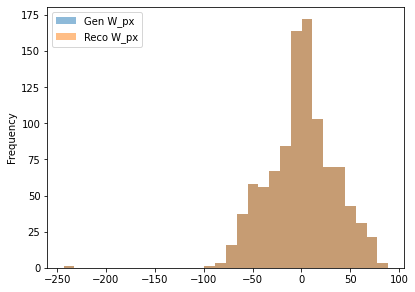

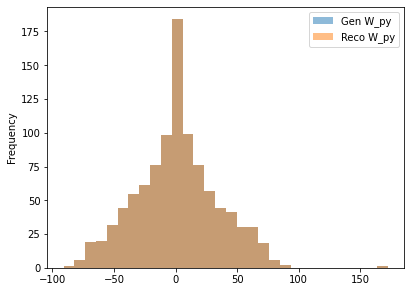

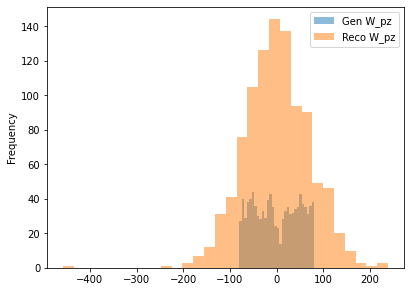

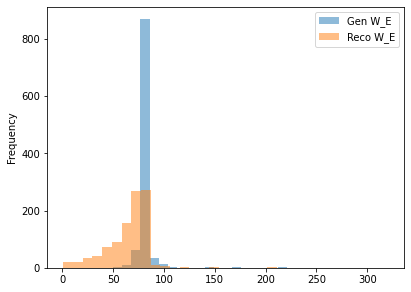

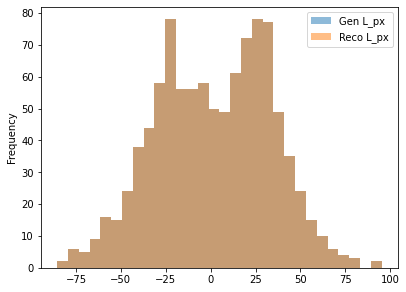

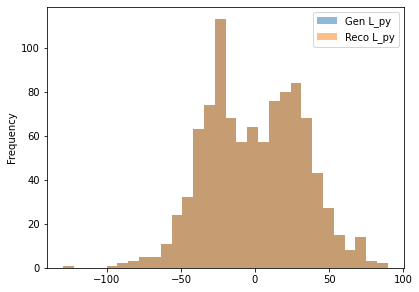

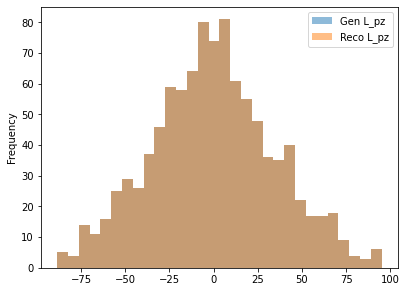

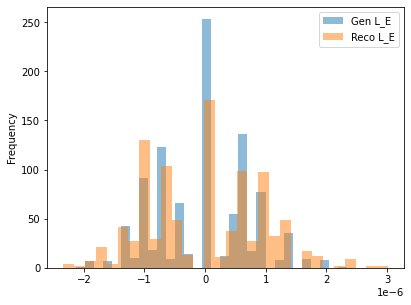

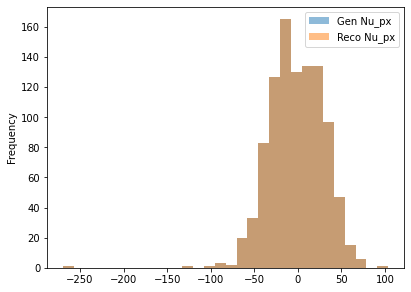

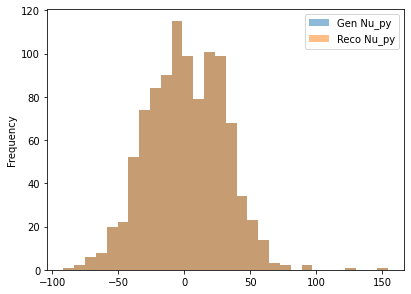

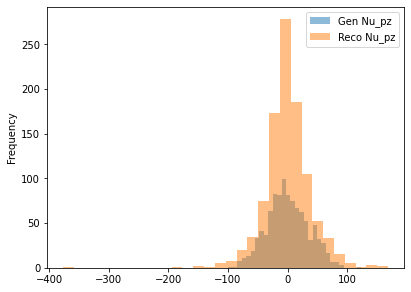

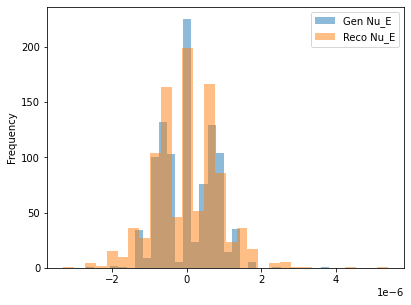

In [408]:
for (gen_col, reco_col) in zip(gen_df, reco_df.columns[2:]):
    plt.figure()
    
    kwargs = {
        "alpha": 0.5,
        "legend": True,
        "bins": 30,
    }
    
    # normalize
    
    ax = gen_df[gen_col].rename(f"Gen {gen_col}").plot.hist(**kwargs)
    reco_df[reco_col].rename(f"Reco {reco_col}").plot.hist(ax=ax, **kwargs)

In [416]:
# e^2 = m^2 + p^2
# L and Nu mass = 0
# Nu_px = MET_x
# W_px = MET_x + L_px
class WLNuDataset(torch.utils.data.Dataset):
    def __init__(self, filepath="../data/wlnu.dat"):
        self.reg_exp = WLNuDataset._make_reg_exp()
        
    def __iter__(self):
        text = ""
        with open("../data/wlnu.dat") as f:
            
            nl_seen = 0
            while nl_seen < 10:
                text += f.read()

In [417]:
dataset = WLNuDataset()